In [1]:
import os
import polars as pl
from src.add_rule_types import AddRuleTypes
import pandas as pd

from globals_dir.models import MODELS
from globals_dir.api import API
from globals_dir.globals import GLOBALS
from classification.classifier import Classifier

csv_path = "/Users/yuda/PycharmProjects/RIG_v2/evaluation/data/data_yuda.csv"
df = pl.read_csv(csv_path)

model_name = ['nomic-embed-text', "mxbai-embed-large", "snowflake-arctic-embed", "snowflake-arctic-embed2", "snowflake-arctic-embed:110m", "snowflake-arctic-embed:33m", "snowflake-arctic-embed:137m", "all-minilm", "all-minilm:33m", "bge-large", "bge-m3", "paraphrase-multilingual"][6]


ERROR:root:Warning: GEMMA_MODEL_PATH is invalid or does not exist: gemma2:2b
ERROR:root:Warning: EMBED_MODEL_PATH is invalid or does not exist: snowflake-arctic-embed:137m


the first column is the index column. e.g. - type_name


In [2]:
# MODELS.ollamamia.funcs.pull("all-minilm")

In [3]:
folder_path = "/Users/yuda/PycharmProjects/RIG_v2/evaluation/data/rule_types/"
AddRuleTypes(folder_path)

In [4]:
num = 2
write_csv_path = f"/Users/yuda/PycharmProjects/RIG_v2/evaluation/outputs/classification_errors_{GLOBALS.embed_model_path}.csv"
def clean_text(text):
    """Remove all non-alphanumeric characters and convert to lowercase."""
    return ''.join(char.lower() for char in text if char.isalnum())

def evaluate_accuracy():
    classification = Classifier()
    rows = []
    correct_predictions = 0

    # Iterate through the DataFrame rows
    for i, row in enumerate(df.iter_rows(named=True)):
        # Extract the free_text, actual type_name, and expected classification
        free_text = row['free_text']
        actual_type_name = row['rule_types_names']
        id_free_text = row['id']

        # Predict the type name using the RAG API
        predicted_type_name = str(classification.predict(free_text)[0])

        # Clean strings for comparison
        actual_type_name_cleaned = clean_text(actual_type_name)
        predicted_type_name_cleaned = clean_text(predicted_type_name)

        # Debugging: Print the cleaned strings
        # print(f"Actual (cleaned): {actual_type_name_cleaned}")
        # print(f"Predicted (cleaned): {predicted_type_name_cleaned}")

        # Calculate the score (1 for correct, 0 for incorrect)
        score = 1 if predicted_type_name_cleaned == actual_type_name_cleaned else 0
        correct_predictions += score
        print(correct_predictions / (i + 1))

        # Append the results to the rows
        rows.append({
            "id": id_free_text,
            "score": score,
            "predicted": predicted_type_name_cleaned,
            "actual": actual_type_name_cleaned,
            "free_text": free_text,
        })
    print("escape")
    # Convert rows to a DataFrame
    results_df = pl.DataFrame(rows)

    # Calculate the final score
    accuracy = correct_predictions / len(df)

    return results_df, accuracy

# Run the evaluation
results_df, final_score = evaluate_accuracy()

# Print the final accuracy score
print(f"Accuracy Score: {final_score:.2%}")

# Print rows where the prediction was incorrect
errors = results_df.filter(pl.col("score") == 0).to_dicts()
# print("Errors:", errors)

# Optional: Save errors to a CSV
results_df.filter(pl.col("score") == 0).write_csv(write_csv_path)

# print("results_df['actual'].unique():\n")
# for i, _ in enumerate(results_df['actual'].unique()):
#     print(i, _)
# 
# print("results_df['predicted'].unique():\n")
# for i, _ in enumerate(results_df['predicted'].unique()):
#     print(i, _)

results_df = results_df.to_pandas()



1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9090909090909091
0.9166666666666666
0.9230769230769231
0.9285714285714286
0.9333333333333333
0.9375
0.9411764705882353
0.9444444444444444
0.9473684210526315
0.95
0.9523809523809523
0.9545454545454546
0.9565217391304348
0.9583333333333334
0.96
0.9615384615384616
0.9629629629629629
0.9642857142857143
0.9655172413793104
0.9666666666666667
0.967741935483871
0.96875
0.9696969696969697
0.9705882352941176
0.9714285714285714
0.9722222222222222
0.972972972972973
0.9736842105263158
0.9743589743589743
0.975
0.975609756097561
0.9761904761904762
0.9767441860465116
0.9772727272727273
0.9777777777777777
0.9782608695652174
0.9787234042553191
0.9791666666666666
0.9795918367346939
0.98
0.9803921568627451
0.9807692307692307
0.9811320754716981
0.9814814814814815
0.9818181818181818
0.9821428571428571
0.9824561403508771
0.9827586206896551
0.9830508474576272
0.9833333333333333
0.9836065573770492
0.9838709677419355
0.9841269841269841
0.984375
0.9846153846153847
0.9848

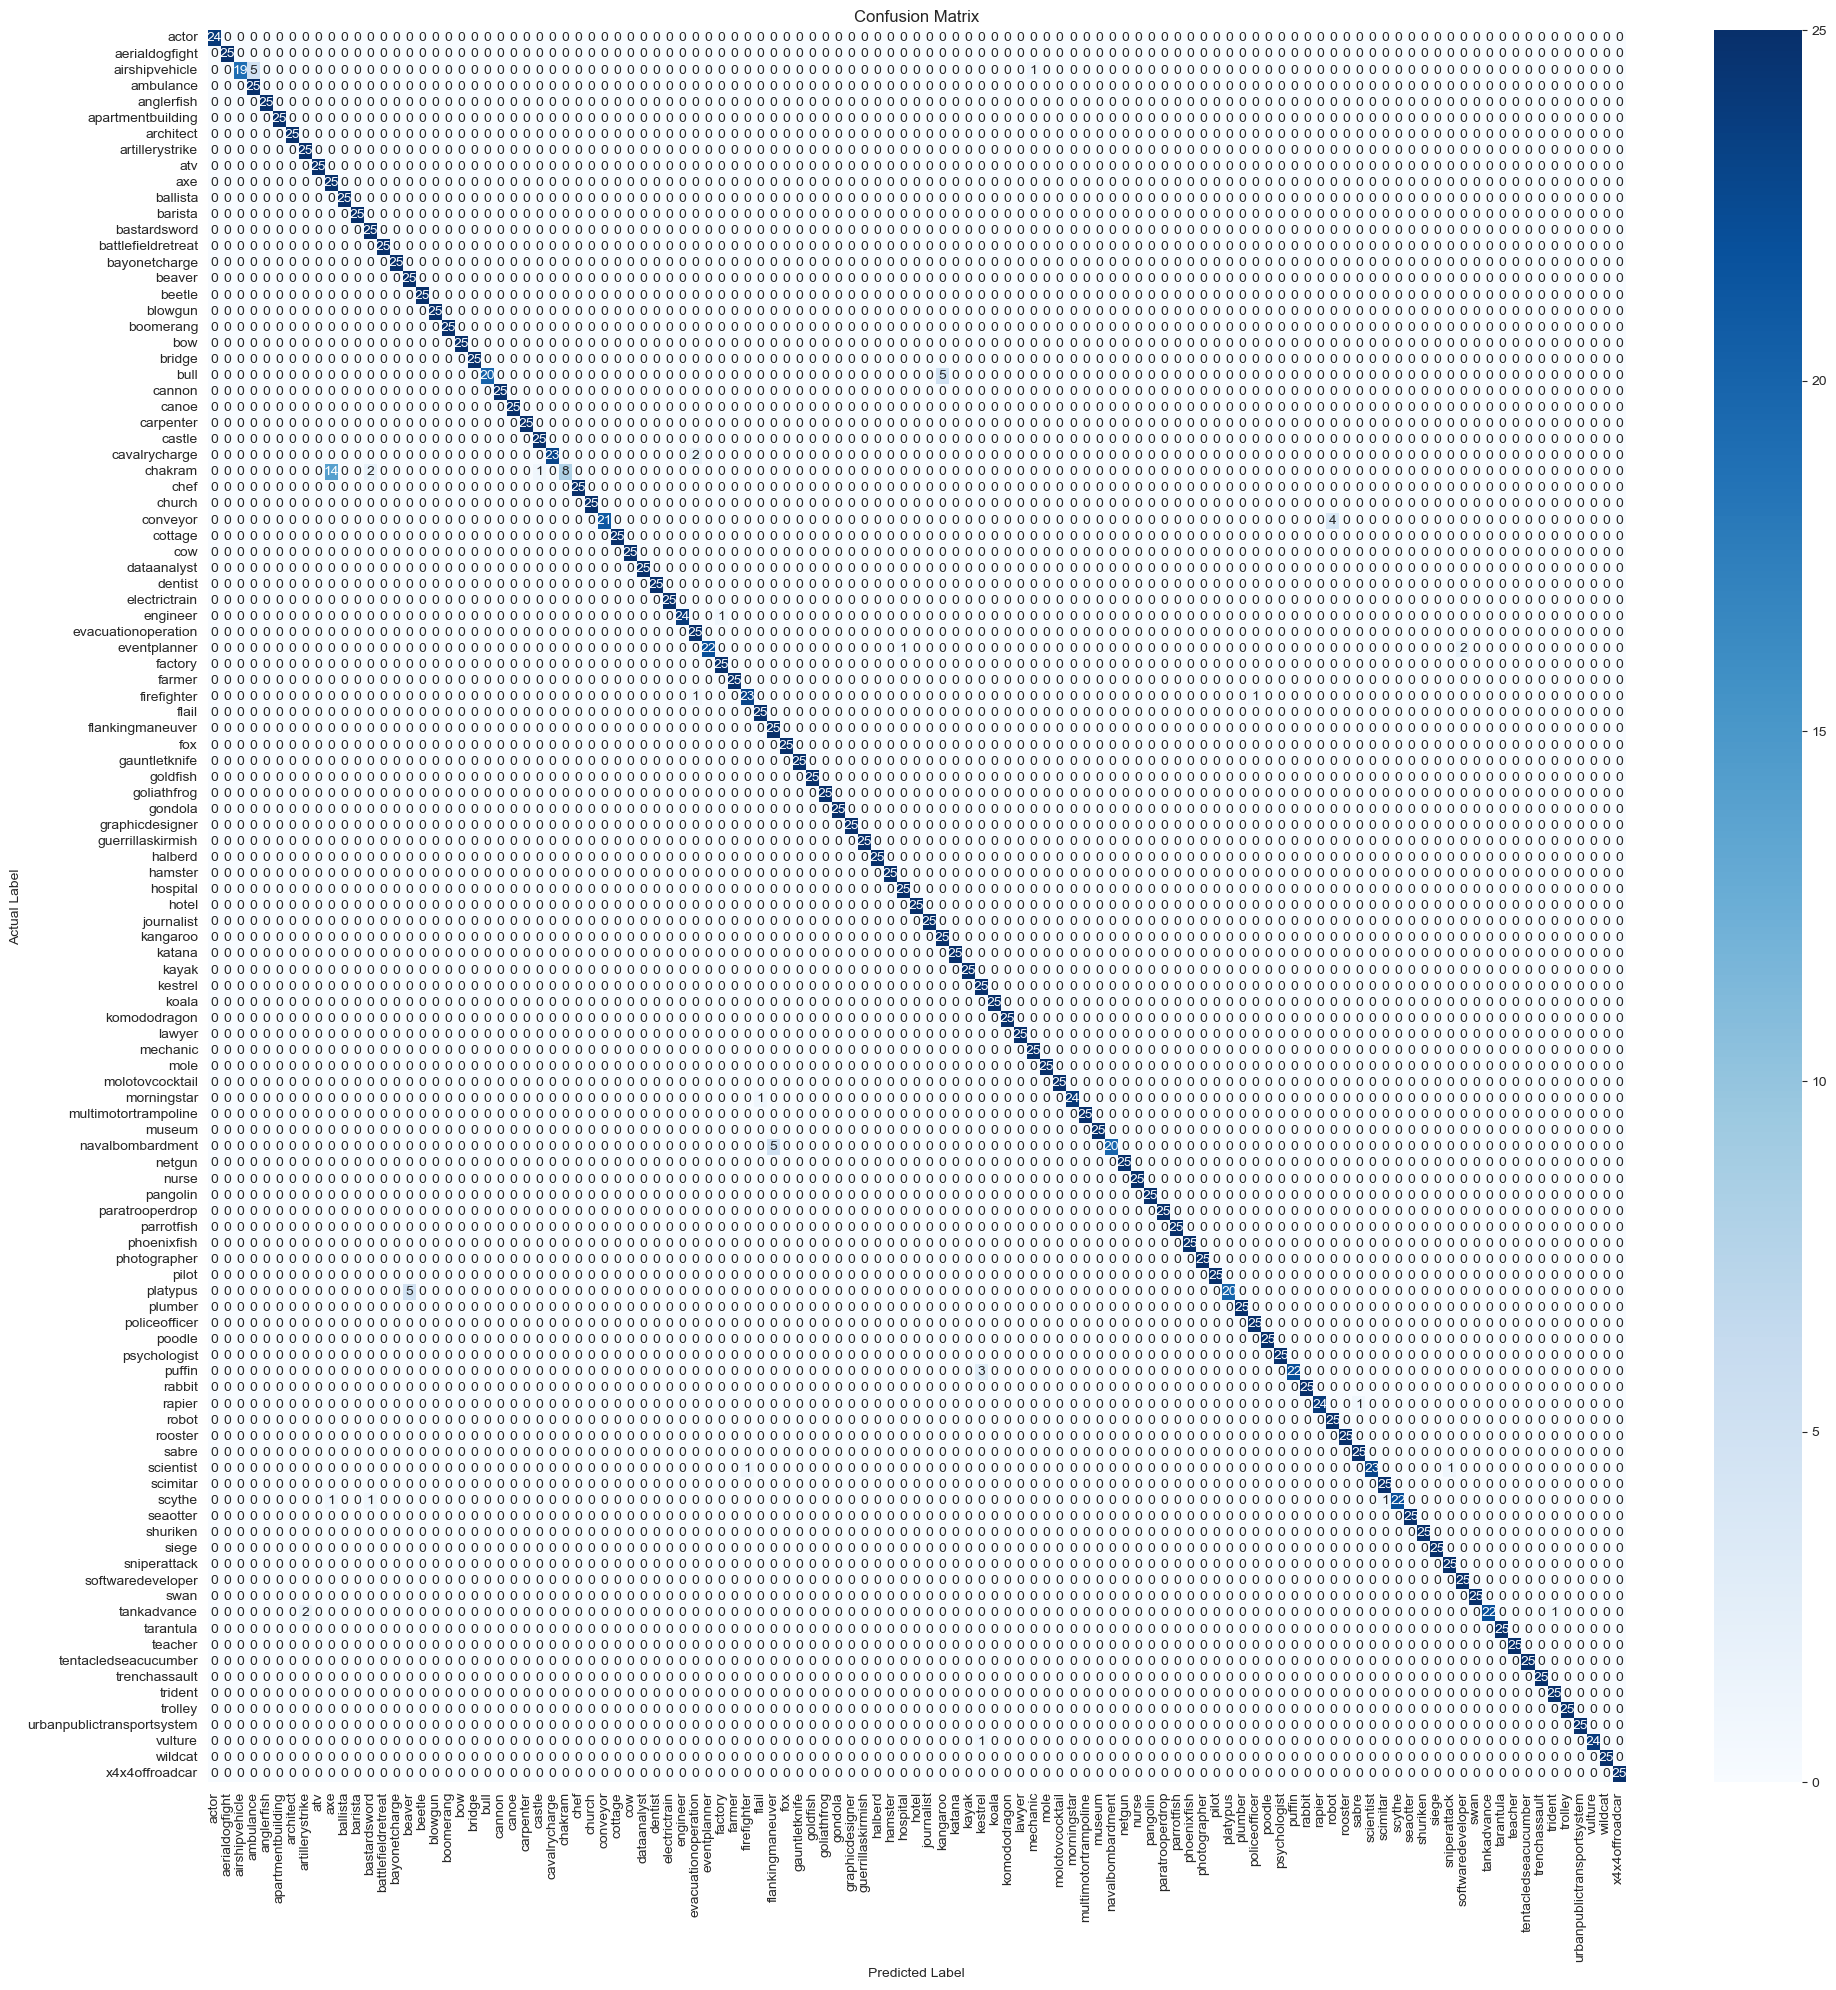

In [5]:

confusion_matrix = pd.crosstab(
    results_df["actual"],
    results_df["predicted"],
    # normalize='index'
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(
    confusion_matrix,
    annot=True,  # Show numbers in each cell
    cmap='Blues',  # Color scheme
    fmt='g',  # Format for the annotations
    xticklabels=confusion_matrix.columns
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

In [6]:
MODELS.ollamamia.stop()

In [7]:
results_df.filter(pl.col("score") == 0).write_csv(write_csv_path)


TypeError: Index(...) must be called with a collection of some kind, <Expr ['[(col("score")) == (dyn int: 0…'] at 0x31AC4F080> was passed